In [32]:
from keras.applications.resnet import ResNet50, preprocess_input
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

In [35]:
# Load ResNet model for feature extraction
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [36]:
# Load ResNet model for feature extraction
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [37]:
# Function to extract features from an image using ResNet
def extract_features_resnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [38]:
# Load images and extract features for training
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 198ms/step


In [39]:
# Load images and extract features for testing
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 192ms/step


In [40]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()


In [41]:
# Convert features to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)


In [42]:
# Flatten the features for training and testing
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [30]:
# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining Decision Tree with {kernel} kernel...\033[0m")

    # Train Decision Tree classifier
    if kernel == 'polynomial_exponential':
        clf = DecisionTreeClassifier()
        clf.fit(x_train_flat, y_train)
    else:
        clf = DecisionTreeClassifier()
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test_flat)

Training Decision Tree with linear kernel...
Training Decision Tree with poly kernel...
Training Decision Tree with rbf kernel...
Training Decision Tree with sigmoid kernel...
Training Decision Tree with polynomial_exponential kernel...


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51        60
           1       0.45      0.50      0.48        60
           2       0.47      0.45      0.46        60
           3       0.65      0.60      0.63        60
           4       0.51      0.52      0.51        60

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

Accuracy: 0.5166666666666667
Sensitivity (Recall): 0.5166666666666666
Specificity: 0.5166666666666666
Precision: 0.5198337124480351
F1 Score: 0.5177218565360858



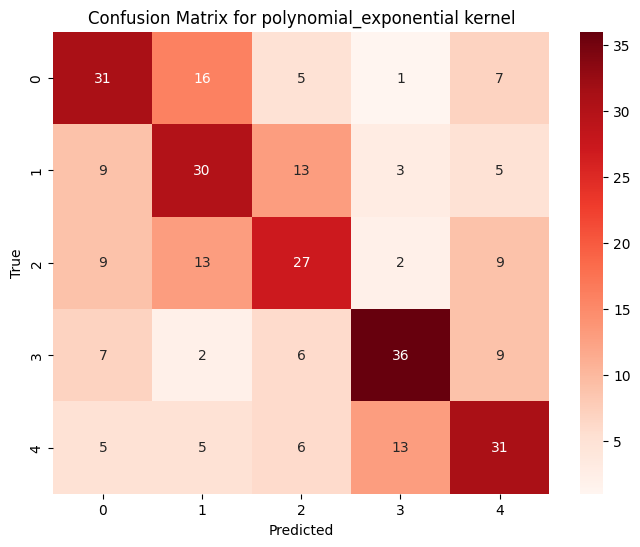

Note: Scikit-learn's DecisionTreeClassifier uses the CART (Classification and Regression Trees) algorithm by default.


In [48]:
# Print performance metrics
print(f'Performance metrics for {kernel} kernel:')
print('Classification Report:')
print(metrics.classification_report(y_test, y_pred))


# Additional performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
specificity = metrics.recall_score(y_test, y_pred, average='macro')
precision = metrics.precision_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}\n')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {kernel} kernel')
plt.show()

print("\033[1mNote:\033[0m Scikit-learn's DecisionTreeClassifier uses the CART (Classification and Regression Trees) algorithm by default.")